<a href="https://colab.research.google.com/github/gpjoshi930/Numerical-Calculation-/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 14s 0us/step
Epoch 1/10
1563/1563 [==============================] - 707s 451ms/step - loss: 1.5068 - accuracy: 0.4485 - val_loss: 1.1893 - val_accuracy: 0.5731
Epoch 2/10
1563/1563 [==============================] - 632s 404ms/step - loss: 1.0434 - accuracy: 0.6334 - val_loss: 0.9521 - val_accuracy: 0.6701
Epoch 3/10
1563/1563 [==============================] - 610s 390ms/step - loss: 0.8333 - accuracy: 0.7095 - val_loss: 0.8686 - val_accuracy: 0.6969
Epoch 4/10
1563/1563 [==============================] - 604s 386ms/step - loss: 0.6965 - accuracy: 0.7583 - val_loss: 0.8193 - val_accuracy: 0.7171
Epoch 5/10
1563/1563 [==============================] - 637s 407ms/step - loss: 0.5875 - accuracy: 0.7935 - val_loss: 0.7818 - val_accuracy: 0.7419
Epoch 6/10
1563/1563 [==============================] - 665s 425ms/step - loss: 0.4941 - accuracy: 0.8265 - val_loss: 0.8455 - val_accuracy: 0.7324
Epoch 7/10
1563/1563 [======================

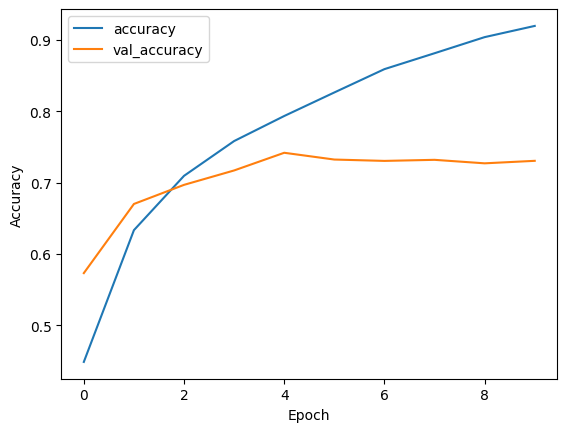

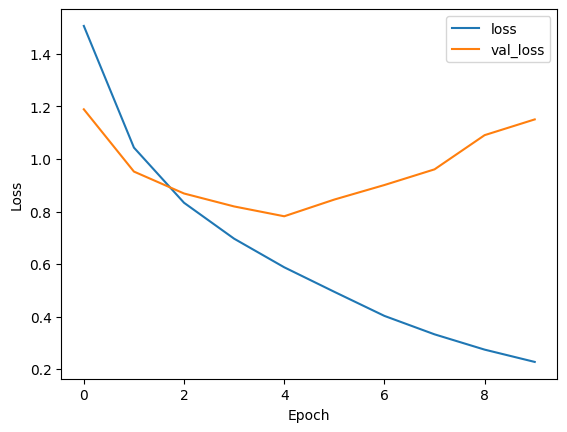

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load and preprocess
(train_images, train_labels), (val_images, val_labels) = tf.keras.datasets.cifar10.load_data()
train_images, val_images = train_images / 255.0, val_images / 255.0

# Define your modified architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Customize the number of convolutions between downsampling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Customize the number of filters in each layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))  # Increased number of filters
model.add(layers.MaxPooling2D((2, 2)))

# Customize the initial "patchify" layer
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model with an appropriate optimizer, loss function, and metrics
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Plot training and validation accuracy/loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
